In [2]:
#Forecasting(Vegetable Prices)
#Forecasting - predicting with respect to time
#Applications - Weather forecasting,stock performance forecasting,etc
#Library - FB Prophet(Facebook) - for forecasting
#1 quintal - 100 kgs
#1 ton - 1000 kgs

In [ ]:
#1.Take the data and create dataframe
import pandas as pd
df = pd.read_html('/content/DailyWiseMarketArrivals.html')[-1]
df

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.shape #4189 rows and 6 cols

(4189, 6)

In [6]:
df.size #It tells us the total number of elements in df

25134

In [7]:
df.info() #It gives us the complete information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4188 non-null   object
 1   Market                4189 non-null   object
 2   Arrival(q)            4189 non-null   int64 
 3   Price Minimum (Rs/q)  4189 non-null   object
 4   Price Maximum (Rs/q)  4189 non-null   object
 5   Modal Price (Rs/q)    4189 non-null   object
dtypes: int64(1), object(5)
memory usage: 196.5+ KB


In [8]:
#Now let us check for the null values in all the columns
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [9]:
#Let us drop the null value
df = df.dropna()

In [10]:
df.isnull().sum()

Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [11]:
#Rules for FB Prophet

#the data to be given to fbprophet ,is always in form of ds(relation of time) and y
#We are considering the 'date' column as 'ds' and the 'modal (average of min max) price column' as 'y'
#Now rename the 'date' column as 'ds' and 'modal price' column as 'y'
df = df.rename(columns = {'Modal Price (Rs/q)':'y','Date':'ds'})
df

,ds,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),y
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4183,04/Jun/2022,BANGALORE,9670,2400,2800,2400
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800


In [ ]:
#Now let us create a new dataframe and take only the required columns
df_new = df[['ds','y']]
df_new

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4188 non-null   object
 1   y       4188 non-null   object
dtypes: object(2)
memory usage: 98.2+ KB


In [ ]:
#The datatype of ds column is not in desired datatype format
#Hence we are converting the ds column's datatype into datetime format
#We are converting the y column's datatype into integer format
df_new['ds'] = pd.to_datetime(df_new['ds'])
df_new['y'] = df_new['y'].astype(int)
df_new.info()

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4188 non-null   datetime64[ns]
 1   y       4188 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 98.2 KB


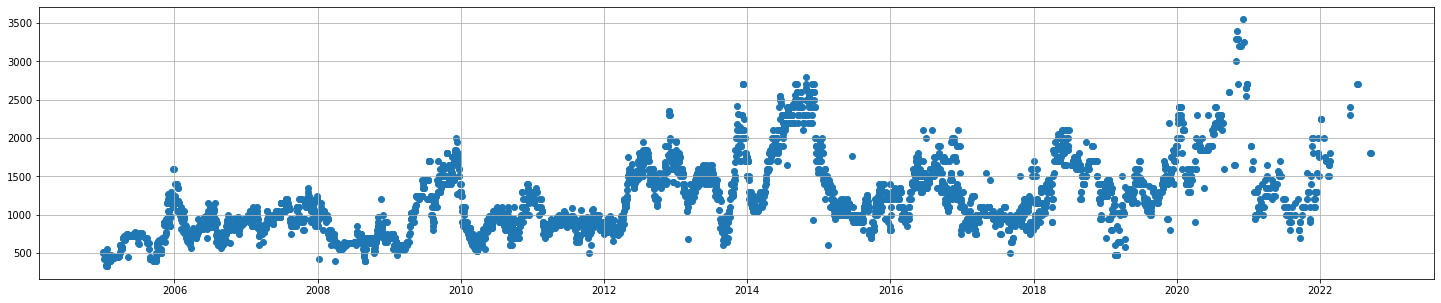

In [23]:
#VISUALISATION
import matplotlib.pyplot as plt
plt.figure(figsize = (25,5))
plt.scatter(df_new['ds'],df_new['y'])
plt.grid()

In [17]:
#FB PROPHET
import prophet
op = prophet.Prophet()
op.fit(df_new) #We are giving the data of df_new to the prophet library

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwf07f38u/2jc2gm9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwf07f38u/vw6k1iew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82517', 'data', 'file=/tmp/tmpwf07f38u/2jc2gm9q.json', 'init=/tmp/tmpwf07f38u/vw6k1iew.json', 'output', 'file=/tmp/tmpwf07f38u/prophet_modelmm1bni19/prophet_model-20230111050823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:08:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:08:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
forecast = op.make_future_dataframe(periods = 365,freq = 'D')
forecast = op.predict(forecast)

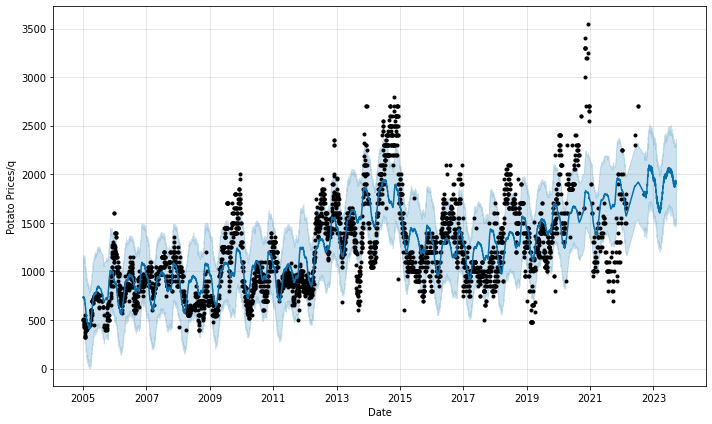

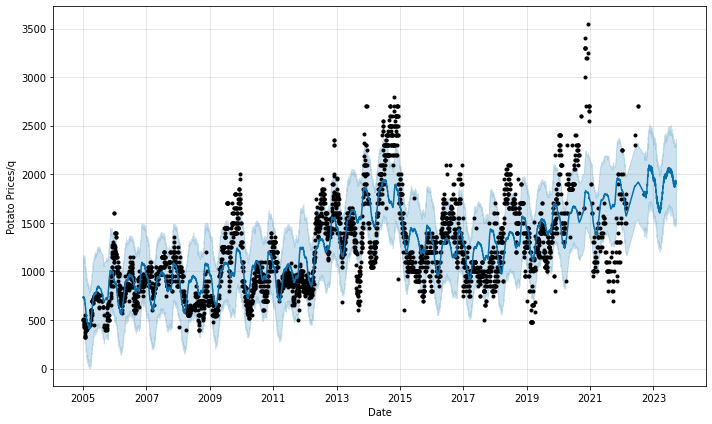

In [25]:
op.plot(forecast,xlabel = 'Date',ylabel = 'Potato Prices/q')
#The black dots are the Actual Potato prices from 1st jan 2005 - 17th sep ,2022
#The light blue shade is the minimum and the maximum prices of potato as predicted by our model
#The dark blue line - is the the best fit line.